## Car Sales Price Prediction
                            

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Data Preprocessing & Cleaning


Preprocessing & Cleaning data to ensure that it is in a format that the network can accept is a common first step in deep learning workflows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

## Droping the columns which are not needed

In [6]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


## Train test split

In [8]:
X=df.drop('car purchase amount', axis=1)
y=df['car purchase amount']

## Data Scaling

Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X=scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400, 1)
(100, 1)


## Model structure

In [12]:
import tensorflow as tf


In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [14]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Training

In [15]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100


10/10 [==============================] - 3s 56ms/step - loss: 0.4995 - mean_absolute_error: 0.6824 - val_loss: 0.4734 - val_mean_absolute_error: 0.6623
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4077 - mean_absolute_error: 0.6157 - val_loss: 0.4034 - val_mean_absolute_error: 0.6099
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3445 - mean_absolute_error: 0.5643 - val_loss: 0.3436 - val_mean_absolute_error: 0.5607
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2839 - mean_absolute_error: 0.5092 - val_loss: 0.2773 - val_mean_absolute_error: 0.4998
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2193 - mean_absolute_error: 0.4434 - val_loss: 0.2093 - val_mean_absolute_error: 0.4286
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1582 - mean_absolute_error: 0.3719 - val_loss: 0.1518 - val_mean_absolute_error: 0.3580
Epoch 7/100
10/1

Epoch 48/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0717 - val_loss: 0.0093 - val_mean_absolute_error: 0.0773
Epoch 49/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0082 - mean_absolute_error: 0.0711 - val_loss: 0.0092 - val_mean_absolute_error: 0.0770
Epoch 50/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0081 - mean_absolute_error: 0.0708 - val_loss: 0.0091 - val_mean_absolute_error: 0.0765
Epoch 51/100
10/10 [==============================] - 0s 13ms/step - loss: 0.0080 - mean_absolute_error: 0.0703 - val_loss: 0.0090 - val_mean_absolute_error: 0.0759
Epoch 52/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0079 - mean_absolute_error: 0.0702 - val_loss: 0.0089 - val_mean_absolute_error: 0.0754
Epoch 53/100
10/10 [==============================] - 0s 27ms/step - loss: 0.0078 - mean_absolute_error: 0.0696 - val_loss: 0.0087 - val_mean_absolute_error: 0.0746
Epoch 54/1

10/10 [==============================] - 0s 10ms/step - loss: 3.7648e-04 - mean_absolute_error: 0.0150 - val_loss: 4.5167e-04 - val_mean_absolute_error: 0.0150
Epoch 98/100
10/10 [==============================] - 0s 9ms/step - loss: 3.5054e-04 - mean_absolute_error: 0.0145 - val_loss: 4.1874e-04 - val_mean_absolute_error: 0.0143
Epoch 99/100
10/10 [==============================] - 0s 8ms/step - loss: 3.1167e-04 - mean_absolute_error: 0.0137 - val_loss: 3.9173e-04 - val_mean_absolute_error: 0.0136
Epoch 100/100
10/10 [==============================] - 0s 7ms/step - loss: 2.9726e-04 - mean_absolute_error: 0.0134 - val_loss: 3.6580e-04 - val_mean_absolute_error: 0.0134


## Visualizing Model Performance

In [16]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'



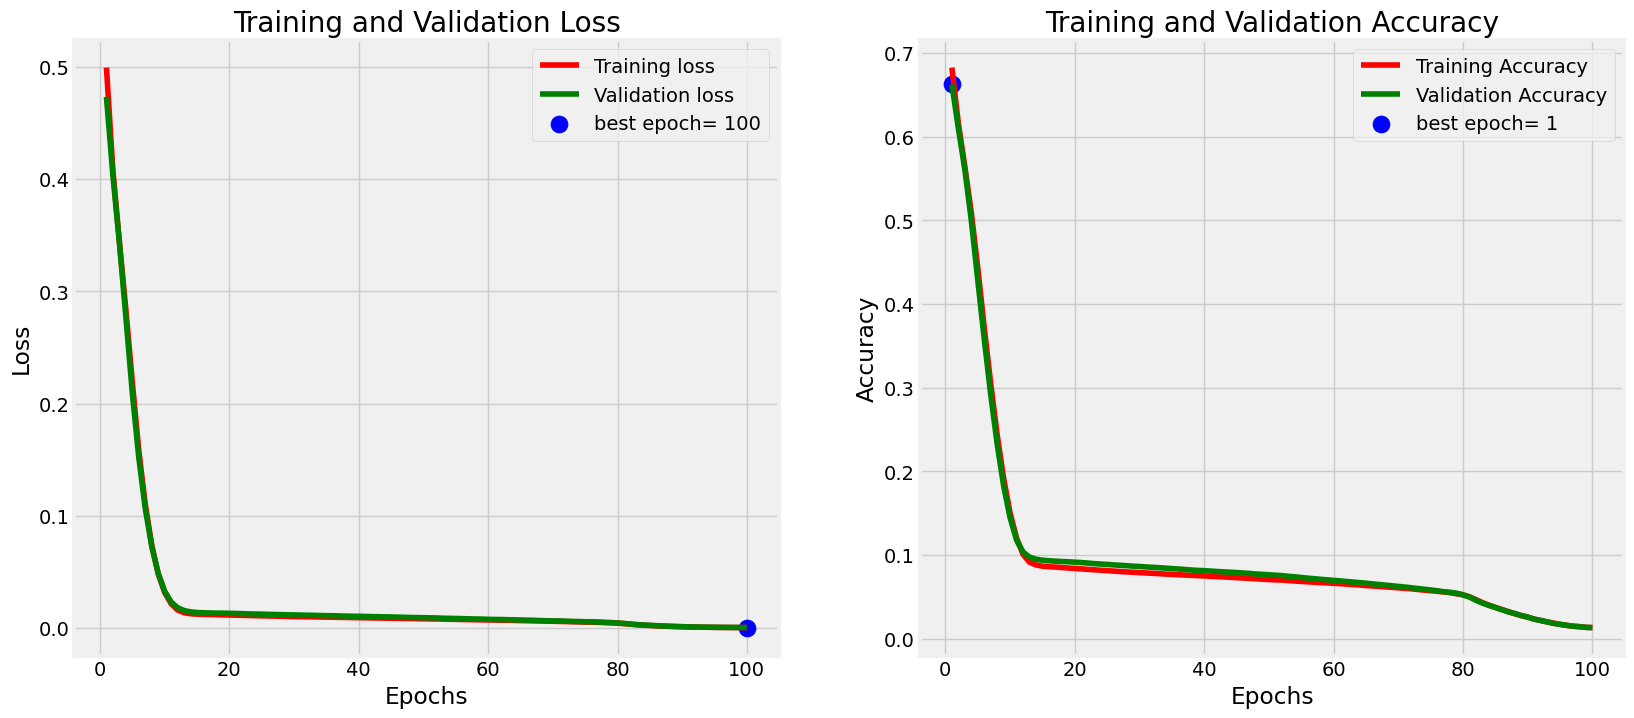

In [17]:
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


## Evaluate model

In [18]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [19]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )


R2 Score= 0.9873831352400517
